# Analysis of Hate Crime in India from 2001-2012

Maintain a Zoom Level on the WebPage to around 70 as it will be better in Understanding the plots as more amount of data could be seen in one frame. Thank You!

**What is a hate crime?**

A hate crime is when someone commits a crime against you because of your disability, gender identity, race, sexual orientation, religion, or any other perceived difference.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading CSV files 
1. cbd stands for Crime by District
2. cbdr stands for Crime by Distrct Rt
3. cbs stands for Crime by State
4. cbsr stands for Crime by State Rt

In [2]:
cbd = pd.read_csv("../input/crimeanalysis/crime_by_district.csv")
cbdr = pd.read_csv("../input/crimeanalysis/crime_by_district_rt.csv")
cbs = pd.read_csv("../input/crimeanalysis/crime_by_state.csv")
cbsr = pd.read_csv("../input/crimeanalysis/crime_by_state_rt.csv")

# DATA PREPROCESSING

Shape gives the number of rows and number of coloumns in the dataframe.

In [3]:
cbd.head()

,STATE/UT,DISTRICT,Year,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,4,0,0,0,3,0,15,32
1,ANDHRA PRADESH,ANANTAPUR,2001,0,4,0,0,0,0,49,21,0,53
2,ANDHRA PRADESH,CHITTOOR,2001,3,3,0,0,0,0,38,36,0,34
3,ANDHRA PRADESH,CUDDAPAH,2001,0,3,0,0,0,0,20,52,0,25
4,ANDHRA PRADESH,EAST GODAVARI,2001,1,3,0,0,0,0,3,12,63,7


In [4]:
cbdr.head()

,STATE/UT,DISTRICT,Year,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,4,0,0,0,3,0,15,32
1,ANDHRA PRADESH,ANANTAPUR,2001,0,4,0,0,0,0,49,21,0,53
2,ANDHRA PRADESH,CHITTOOR,2001,3,3,0,0,0,0,38,36,0,34
3,ANDHRA PRADESH,CUDDAPAH,2001,0,3,0,0,0,0,20,52,0,25
4,ANDHRA PRADESH,EAST GODAVARI,2001,1,3,0,0,0,0,3,12,63,7


In [5]:
cbd.shape

(9841, 13)

In [6]:
cbdr.shape

(9385, 13)

**'Total1' is used to store values which are not common in 'CBD' and 'CBDR'**

In [7]:
total1 = pd.concat([cbd,cbdr]).drop_duplicates(keep = False)

**I have added a new column to the DataFrame 'Total1' so that all the crimes comes under one column. This will be useful later on.**

In [8]:
total1['Total Atrocities'] = total1['Murder'] +total1['Assault on women']+total1['Kidnapping and Abduction']+total1['Dacoity']+total1['Robbery']+total1['Arson']+total1['Hurt']+total1['Prevention of atrocities (POA) Act']+total1['Protection of Civil Rights (PCR) Act']+total1['Other Crimes Against SCs']
total1.head()

,STATE/UT,DISTRICT,Year,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs,Total Atrocities
28,ANDHRA PRADESH,TOTAL,2001,45,69,22,3,2,6,518,950,312,1006,2933
42,ARUNACHAL PRADESH,TOTAL,2001,0,0,0,0,0,0,0,0,0,0,0
70,ASSAM,TOTAL,2001,0,0,0,0,1,1,4,0,0,0,6
115,BIHAR,TOTAL,2001,28,35,8,2,1,17,378,513,81,240,1303
134,CHHATTISGARH,TOTAL,2001,8,52,8,0,1,0,101,164,1,166,501


In [9]:
cbs.shape

(456, 12)

In [10]:
cbsr.shape

(420, 12)

**Similarly, the crime for states duplicates are removed and different values are stored in 'Total' DataFrame.**

In [11]:
total = pd.concat([cbs,cbsr]).drop_duplicates(keep = False)

In [12]:
total.shape

(36, 12)

This shows that the different values between 'CBS' and "CBSR" was the total value of number of crimes of States and UTs in a Year. Then these values are added to the total Sum for Hate Crime in the particular years for State and UTs.

In [13]:
total.head(20)

,STATE/UT,Year,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
336,TOTAL (STATES),2001,763,1315,400,41,133,354,4547,13094,618,12201
337,TOTAL (STATES),2002,739,1331,319,29,105,322,4491,10755,999,14383
338,TOTAL (STATES),2003,580,1088,232,24,70,204,3965,8035,618,11400
339,TOTAL (STATES),2004,654,1157,253,26,72,211,3824,8887,344,11432
340,TOTAL (STATES),2005,669,1172,258,26,80,210,3847,8475,278,11073
341,TOTAL (STATES),2006,673,1217,280,30,90,226,3760,8559,391,11804
342,TOTAL (STATES),2007,673,1349,332,23,86,238,3814,9795,182,13490
343,TOTAL (STATES),2008,622,1453,476,50,81,224,4134,11428,252,14644
344,TOTAL (STATES),2009,629,1350,510,42,67,195,4322,11003,140,15089
345,TOTAL (STATES),2010,571,1350,509,41,75,150,4343,10401,117,15039


In [14]:
total.tail(20)

,STATE/UT,Year,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
436,TOTAL (UTs),2005,0,0,0,0,0,0,0,22,13,4
437,TOTAL (UTs),2006,0,0,0,0,0,0,0,22,14,4
438,TOTAL (UTs),2007,1,0,0,0,0,0,0,24,24,0
439,TOTAL (UTs),2008,0,0,1,0,0,0,0,37,27,1
440,TOTAL (UTs),2009,0,0,1,0,0,0,0,34,28,2
441,TOTAL (UTs),2010,1,0,1,0,0,0,1,18,26,0
442,TOTAL (UTs),2011,0,0,0,0,0,0,0,26,15,8
443,TOTAL (UTs),2012,2,0,0,0,0,0,0,40,20,8
444,TOTAL (ALL-INDIA),2001,763,1316,400,41,133,354,4547,13113,633,12201
445,TOTAL (ALL-INDIA),2002,739,1331,319,29,105,322,4491,10770,1018,14383


**As Hate Crime by UT and State are summed to form 'TOTAL (ALL-INDIA)' row for hate crimes, these are regarded and the rest I have dropped from the DataFrame.**

In [15]:
total.drop(total[total['STATE/UT'] == 'TOTAL (UTs)'].index , inplace = True) 
total.drop(total[total['STATE/UT'] == 'TOTAL (STATES)'].index , inplace = True) 

'DataFrame'.isnull().sum() is used to show that if there is any Null value present in the DataFrame.

In [16]:
cbdr.isnull().sum()

STATE/UT                                0
DISTRICT                                0
Year                                    0
Murder                                  0
Assault on women                        0
Kidnapping and Abduction                0
Dacoity                                 0
Robbery                                 0
Arson                                   0
Hurt                                    0
Prevention of atrocities (POA) Act      0
Protection of Civil Rights (PCR) Act    0
Other Crimes Against SCs                0
dtype: int64

In [17]:
cbsr.isnull().sum()

STATE/UT                                0
Year                                    0
Murder                                  0
Assault on women                        0
Kidnapping and Abduction                0
Dacoity                                 0
Robbery                                 0
Arson                                   0
Hurt                                    0
Prevention of atrocities (POA) Act      0
Protection of Civil Rights (PCR) Act    0
Other Crimes Against SCs                0
dtype: int64

In [18]:
total.isnull().sum()

STATE/UT                                0
Year                                    0
Murder                                  0
Assault on women                        0
Kidnapping and Abduction                0
Dacoity                                 0
Robbery                                 0
Arson                                   0
Hurt                                    0
Prevention of atrocities (POA) Act      0
Protection of Civil Rights (PCR) Act    0
Other Crimes Against SCs                0
dtype: int64

In [19]:
cbdr['Total Atrocities'] = cbdr['Murder'] +cbdr['Assault on women']+cbdr['Kidnapping and Abduction']+cbdr['Dacoity']+cbdr['Robbery']+cbdr['Arson']+cbdr['Hurt']+cbdr['Prevention of atrocities (POA) Act']+cbdr['Protection of Civil Rights (PCR) Act']+cbdr['Other Crimes Against SCs']


# EXPLORATORY DATA ANAYLSIS ON THE BASIS OF DISTRICTS

In [20]:
s= cbdr.groupby(['STATE/UT','DISTRICT','Year'])['Murder'].sum().reset_index().sort_values(by='Murder',ascending=False)
s.head(10).style.background_gradient(cmap='Reds')

,STATE/UT,DISTRICT,Year,Murder
8095,UTTAR PRADESH,BARABANKI,2005,24
8744,UTTAR PRADESH,SITAPUR,2004,22
260,ANDHRA PRADESH,RANGA REDDY,2002,19
8746,UTTAR PRADESH,SITAPUR,2006,18
8349,UTTAR PRADESH,HARDOI,2002,16
8548,UTTAR PRADESH,MAINPURI,2007,16
8450,UTTAR PRADESH,KANPUR NAGAR,2010,16
8470,UTTAR PRADESH,KHIRI,2001,16
8745,UTTAR PRADESH,SITAPUR,2005,16
8791,UTTAR PRADESH,UNNAO,2003,16


The groupby above shows the highest number of murders done in the STATE/UT and DISTRICT column for all the years in the Dataset.

Majority of the 10 highest spots for murder goes to Uttar Pradesh State for a good range of years.

In [21]:
s= cbdr.groupby(['STATE/UT','DISTRICT','Year'])['Assault on women'].sum().reset_index().sort_values(by='Assault on women',ascending=False)
s.head(10).style.background_gradient(cmap='Purples')

,STATE/UT,DISTRICT,Year,Assault on women
7293,Rajasthan,ALWAR,2013,38
7309,Rajasthan,GANGANAGAR,2013,33
8747,UTTAR PRADESH,SITAPUR,2007,30
7043,RAJASTHAN,GANGANAGAR,2011,29
8741,UTTAR PRADESH,SITAPUR,2001,28
4935,MADHYA PRADESH,VIDISHA,2003,26
4833,MADHYA PRADESH,SHAJAPUR,2002,26
7310,Rajasthan,HANUMANGARH,2013,26
4939,MADHYA PRADESH,VIDISHA,2007,26
4749,MADHYA PRADESH,RAJGARH,2002,25


The groupby above shows the highest number of Assault on women done in the STATE/UT and DISTRICT column for all the years in the Dataset.

Here Assault is highest in Rajasthan with 4 spots taken by Rajasthan in the top 10.

In [22]:
s= cbdr.groupby(['STATE/UT','DISTRICT','Year'])['Kidnapping and Abduction'].sum().reset_index().sort_values(by='Kidnapping and Abduction',ascending=False)
s.head(10).style.background_gradient(cmap='Blues')

,STATE/UT,DISTRICT,Year,Kidnapping and Abduction
8448,UTTAR PRADESH,KANPUR NAGAR,2008,23
7957,UTTAR PRADESH,AGRA,2011,23
8450,UTTAR PRADESH,KANPUR NAGAR,2010,22
8449,UTTAR PRADESH,KANPUR NAGAR,2009,21
8984,Uttar Pradesh,BAREILLY,2013,19
8114,UTTAR PRADESH,BAREILLY,2012,19
8588,UTTAR PRADESH,MEERUT,2011,17
7981,UTTAR PRADESH,ALLAHABAD,2011,17
8451,UTTAR PRADESH,KANPUR NAGAR,2011,17
8452,UTTAR PRADESH,KANPUR NAGAR,2012,16


The groupby above shows the highest number of Kidnapping and Abduction done in the STATE/UT and DISTRICT column for all the years in the Dataset.

Uttar Pradesh takes all the 10 spots for highest number of Crimes in this case which is a high number from the year 2008 and so on.

In [23]:
s= cbdr.groupby(['STATE/UT','DISTRICT','Year'])['Dacoity'].sum().reset_index().sort_values(by='Dacoity',ascending=False)
s.head(10).style.background_gradient(cmap='Greens')

,STATE/UT,DISTRICT,Year,Dacoity
2208,GUJARAT,DAHOD,2002,9
2207,GUJARAT,DAHOD,2001,6
2830,HIMACHAL PRADESH,HAMIRPUR,2003,6
6146,ODISHA,DCP CTC,2008,6
2130,GUJARAT,AHMEDABAD COMMR.,2011,5
2209,GUJARAT,DAHOD,2003,5
3390,JHARKHAND,GARHWA,2010,4
6147,ODISHA,DCP CTC,2009,4
1153,BIHAR,GAYA,2008,4
5304,MAHARASHTRA,PARBHANI,2012,4


The groupby above shows the highest number of Dacoity cases in the STATE/UT and DISTRICT column for all the years in the Dataset.

This is a fairly low number and as the years have progressed the cases have decreased constantly.

In [24]:
s= cbdr.groupby(['STATE/UT','DISTRICT','Year'])['Robbery'].sum().reset_index().sort_values(by='Robbery',ascending=False)
s.head(10).style.background_gradient(cmap='Oranges')

,STATE/UT,DISTRICT,Year,Robbery
300,ANDHRA PRADESH,VIJAYAWADA,2003,14
2208,GUJARAT,DAHOD,2002,12
8095,UTTAR PRADESH,BARABANKI,2005,11
4561,MADHYA PRADESH,HOSHANGABAD,2006,9
2209,GUJARAT,DAHOD,2003,8
2207,GUJARAT,DAHOD,2001,8
1149,BIHAR,GAYA,2004,8
2262,GUJARAT,JUNAGADH,2008,8
1152,BIHAR,GAYA,2007,8
6111,ODISHA,BOLANGIR,2007,8


The groupby above shows the highest number of Robberies done in the STATE/UT and DISTRICT column for all the years in the Dataset.

This has also decreased fairly as years have progressed.

In [25]:
s= cbdr.groupby(['STATE/UT','DISTRICT','Year'])['Arson'].sum().reset_index().sort_values(by='Arson',ascending=False)
s.head(10).style.background_gradient(cmap='RdPu')

,STATE/UT,DISTRICT,Year,Arson
1418,BIHAR,ROHTAS,2009,28
1417,BIHAR,ROHTAS,2008,25
1448,BIHAR,SARAN,2003,20
8747,UTTAR PRADESH,SITAPUR,2007,13
7546,TAMIL NADU,MADURAI RURAL,2007,12
6911,RAJASTHAN,BHARATPUR,2002,12
1005,BIHAR,ARARIA,2004,12
8741,UTTAR PRADESH,SITAPUR,2001,10
6873,RAJASTHAN,ALWAR,2012,10
8091,UTTAR PRADESH,BARABANKI,2001,10


The groupby above shows the highest number of Arson cases in the STATE/UT and DISTRICT column for all the years in the Dataset.

Bihar had the highest number of cases for two consecutive years in the same district.

In [26]:
s= cbdr.groupby(['STATE/UT','DISTRICT','Year'])['Hurt'].sum().reset_index().sort_values(by='Hurt',ascending=False)
s.head(10).style.background_gradient(cmap='Greys')

,STATE/UT,DISTRICT,Year,Hurt
7720,TAMIL NADU,THIRUVALLUR,2001,273
4437,MADHYA PRADESH,CHHATARPUR,2002,208
7142,RAJASTHAN,JODHPUR,2003,207
138,ANDHRA PRADESH,KARIMNAGAR,2003,196
6981,RAJASTHAN,CHURU,2012,159
4443,MADHYA PRADESH,CHHATARPUR,2008,150
4881,MADHYA PRADESH,SIHORE,2002,149
298,ANDHRA PRADESH,VIJAYAWADA,2001,146
6980,RAJASTHAN,CHURU,2011,142
7302,Rajasthan,CHURU,2013,142


In [27]:
s= cbdr.groupby(['STATE/UT','DISTRICT','Year'])['Prevention of atrocities (POA) Act'].sum().reset_index().sort_values(by='Prevention of atrocities (POA) Act',ascending=False)
s.head(10).style.background_gradient(cmap='Purples')

,STATE/UT,DISTRICT,Year,Prevention of atrocities (POA) Act
6910,RAJASTHAN,BHARATPUR,2001,428
1521,BIHAR,VAISHALI,2004,426
1542,Bihar,GAYA,2013,372
1561,Bihar,PATNA,2013,357
1556,Bihar,MUZAFFARPUR,2013,352
1554,Bihar,MOTIHARI,2013,312
1535,Bihar,BEGUSARAI,2013,311
1145,BIHAR,DARBHANGA,2012,296
6911,RAJASTHAN,BHARATPUR,2002,292
7057,RAJASTHAN,JAIPUR,2001,270


The groupby above shows the highest number of Atrocities cases in the STATE/UT and DISTRICT column for all the years in the Dataset.

Bihar and Rajasthan are the states which are most affected here at a high number.

In [28]:
s= cbdr.groupby(['STATE/UT','DISTRICT','Year'])['Protection of Civil Rights (PCR) Act'].sum().reset_index().sort_values(by='Protection of Civil Rights (PCR) Act',ascending=False)
s.head(10).style.background_gradient(cmap='Greens')

,STATE/UT,DISTRICT,Year,Protection of Civil Rights (PCR) Act
161,ANDHRA PRADESH,KRISHNA,2002,153
7394,TAMIL NADU,CHENGAI,2003,149
160,ANDHRA PRADESH,KRISHNA,2001,79
1279,BIHAR,MADHUBANI,2002,71
87,ANDHRA PRADESH,EAST GODAVARI,2003,67
85,ANDHRA PRADESH,EAST GODAVARI,2001,63
8574,UTTAR PRADESH,MAU,2009,60
7673,TAMIL NADU,THANJAVUR,2002,56
86,ANDHRA PRADESH,EAST GODAVARI,2002,52
7675,TAMIL NADU,THANJAVUR,2004,50


The groupby above shows the highest number of Civil rights infringement done in the STATE/UT and DISTRICT column for all the years in the Dataset.

Most of the cases are from Andhra Pradesh and Tamil Nadu in the initial years which have decreased over the years.

In [29]:
s= cbdr.groupby(['STATE/UT','DISTRICT','Year'])['Other Crimes Against SCs'].sum().reset_index().sort_values(by='Other Crimes Against SCs',ascending=False)
s.head(10).style.background_gradient(cmap='Blues')

,STATE/UT,DISTRICT,Year,Other Crimes Against SCs
7720,TAMIL NADU,THIRUVALLUR,2001,819
7721,TAMIL NADU,THIRUVALLUR,2002,723
7293,Rajasthan,ALWAR,2013,549
6920,RAJASTHAN,BHARATPUR,2011,482
7297,Rajasthan,BHARATPUR,2013,467
6921,RAJASTHAN,BHARATPUR,2012,443
6918,RAJASTHAN,BHARATPUR,2009,441
6919,RAJASTHAN,BHARATPUR,2010,437
4912,MADHYA PRADESH,UJJAIN,2004,428
6917,RAJASTHAN,BHARATPUR,2008,416


The groupby above shows the highest number of Crimes against SCs done in the STATE/UT and DISTRICT column for all the years in the Dataset.

Tamil Nadu had consecutively the highest number of cases for the initial years which then dissipated later on. Rajasthan then took the lead for highest number of cases consecutively for 4 years.

In [30]:
s= cbdr.groupby(['STATE/UT','DISTRICT','Year'])['Total Atrocities'].sum().reset_index().sort_values(by='Total Atrocities',ascending=False)
s.head(10).style.background_gradient(cmap='Greys')

,STATE/UT,DISTRICT,Year,Total Atrocities
7720,TAMIL NADU,THIRUVALLUR,2001,1143
7721,TAMIL NADU,THIRUVALLUR,2002,879
1561,Bihar,PATNA,2013,714
7293,Rajasthan,ALWAR,2013,608
138,ANDHRA PRADESH,KARIMNAGAR,2003,554
381,ANDHRA PRADESH,WEST GODAVARI,2009,534
137,ANDHRA PRADESH,KARIMNAGAR,2002,520
6920,RAJASTHAN,BHARATPUR,2011,511
4912,MADHYA PRADESH,UJJAIN,2004,506
7297,Rajasthan,BHARATPUR,2013,489


Tamil Nadu had the highest Hate Crime in the initial years which decreased a lot in the progressive years. Bihar and Rajasthan then had the highest number of cases followed by Andhra Pradesh.

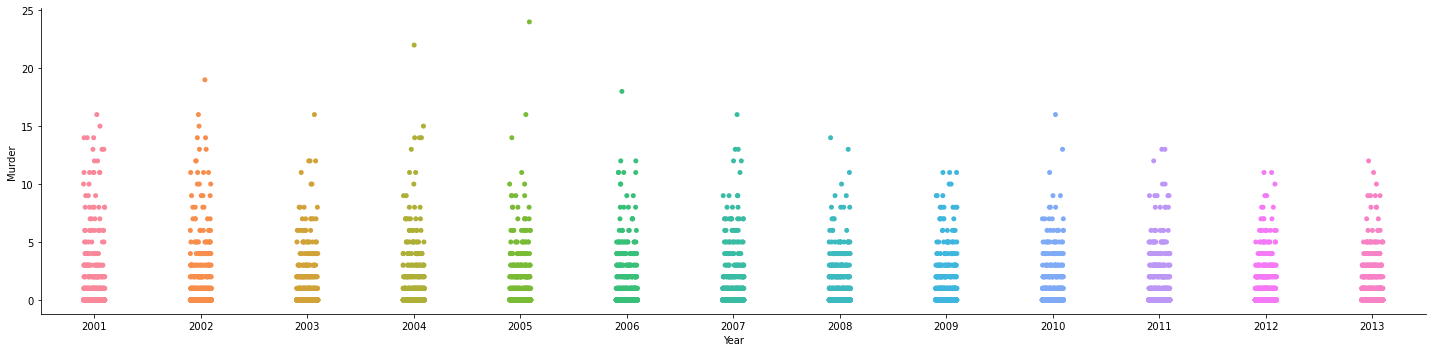

In [31]:
sns.catplot(x='Year', y='Murder', data=cbdr,height = 5, aspect = 4)

This plot shows Murder for successive years and on average 10 murders are done for every state per year for hate crimes. The highest was 24 for the year 2006.

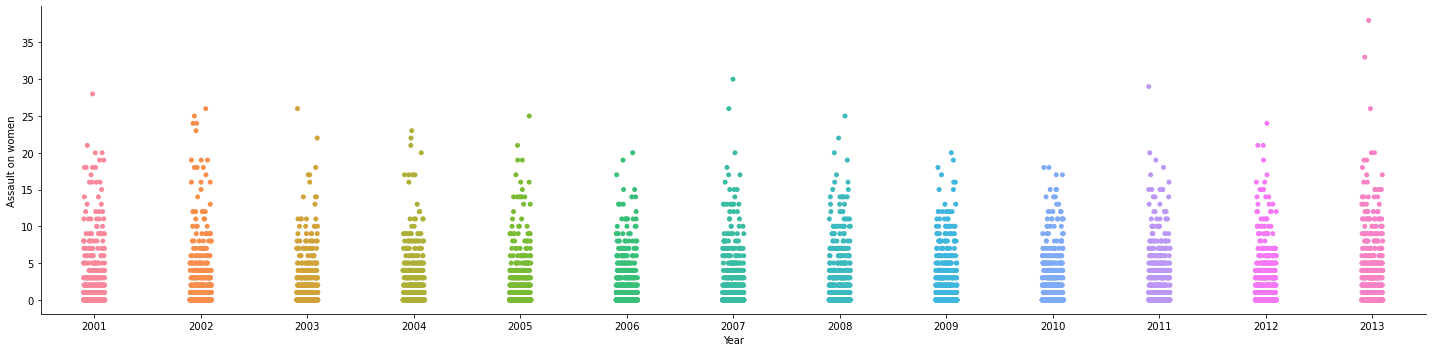

In [32]:
sns.catplot(x='Year', y='Assault on women', data=cbdr,height = 5, aspect = 4)

This plot shows that on average 20 Assaults are made per state on women every year and the highest was recorded for 2013 rising upto 35+.

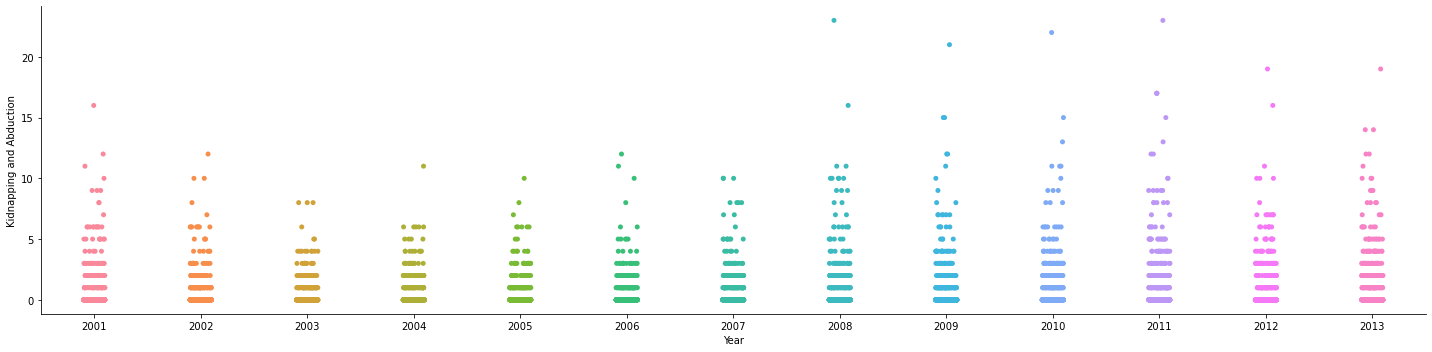

In [33]:
sns.catplot(x='Year', y='Kidnapping and Abduction', data=cbdr,height = 5, aspect = 4)

This plot shows kidnapping and abduction for all the districts. On average, there were around 10 for each year for each state. The 2008-2011 bracket showed the highest number of cases.

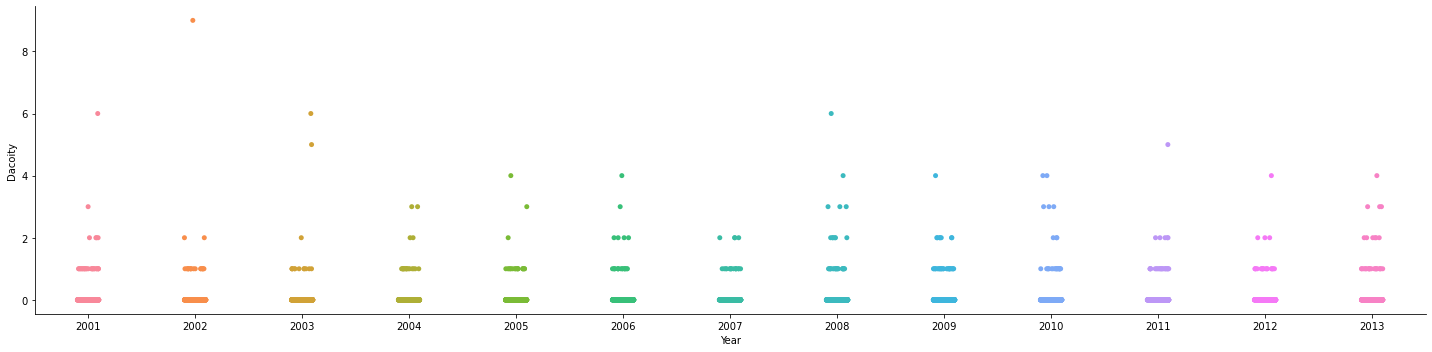

In [34]:
sns.catplot(x='Year', y='Dacoity', data=cbdr,height = 5, aspect = 4)

This plot shows dacoity which is is high initially and it decreased over the years.

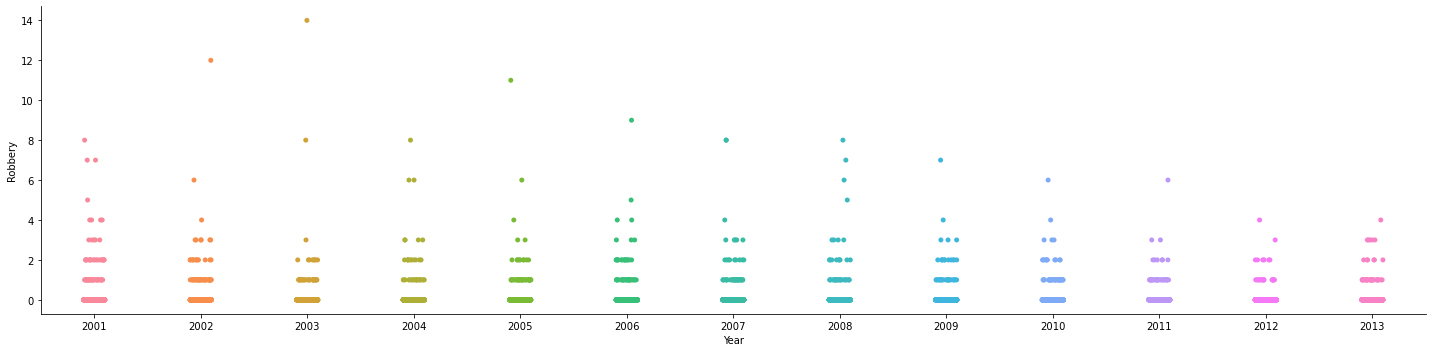

In [35]:
sns.catplot(x='Year', y='Robbery', data=cbdr,height = 5, aspect = 4)

This plot shows cases of robbery which was high initially. It decreased quite a lot as the years progressed.

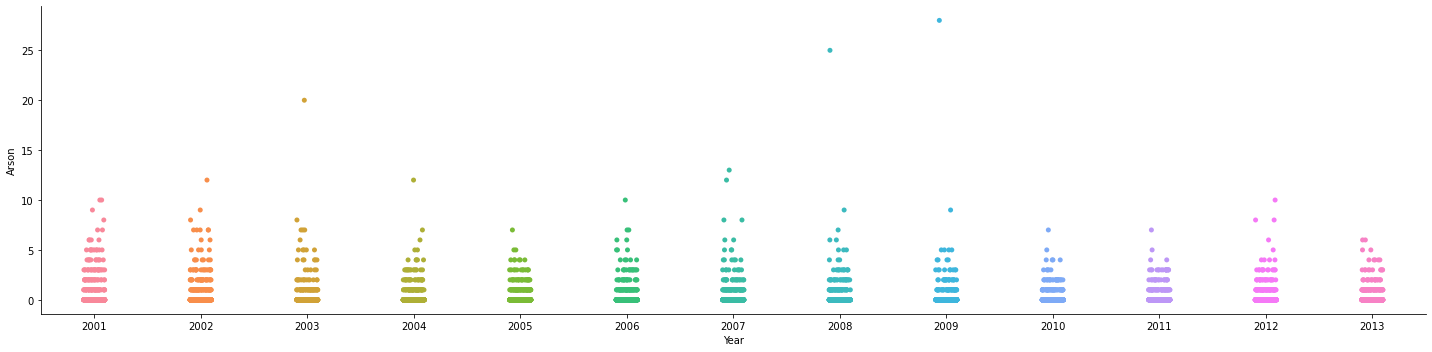

In [36]:
sns.catplot(x='Year', y='Arson', data=cbdr,height = 5, aspect = 4)

This shows cases of Arson which was highest for 2009 and for rest of the years, it maintains a constant rate which is around 6.

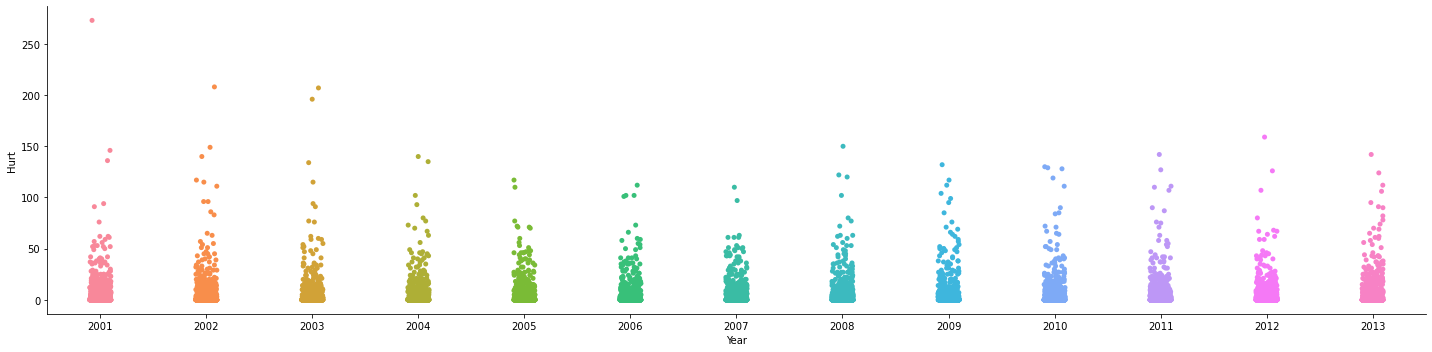

In [37]:
sns.catplot(x='Year', y='Hurt', data=cbdr,height = 5, aspect = 4)

This shows that many states have high number of hurt cases with the maximum people in the range of 0-50 and some of the cases reach upto 250. This shows that a huge number of people suffer in this bracket.

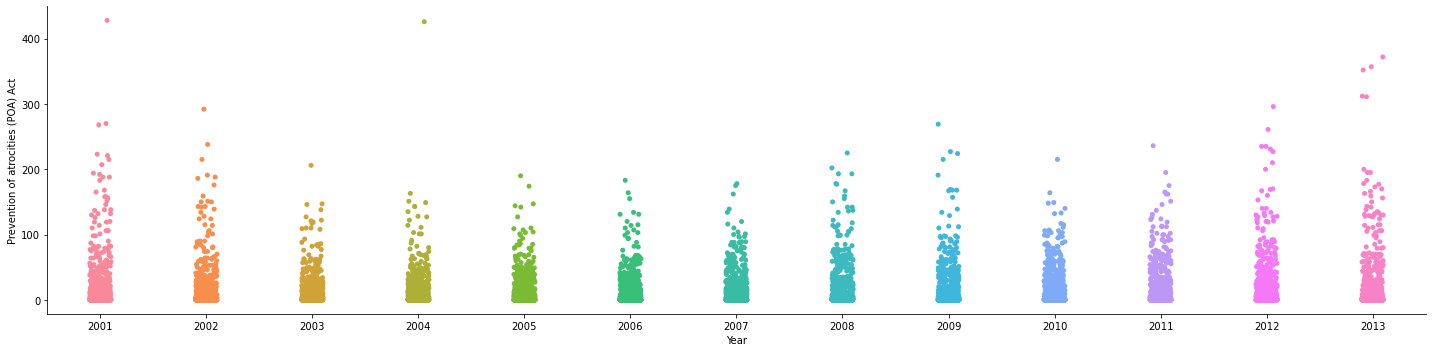

In [38]:
sns.catplot(x='Year', y='Prevention of atrocities (POA) Act', data=cbdr,height = 5, aspect = 4)

This shows that a huge number of people are attacked which is around 0-100 for each state and they are shileded under this act.

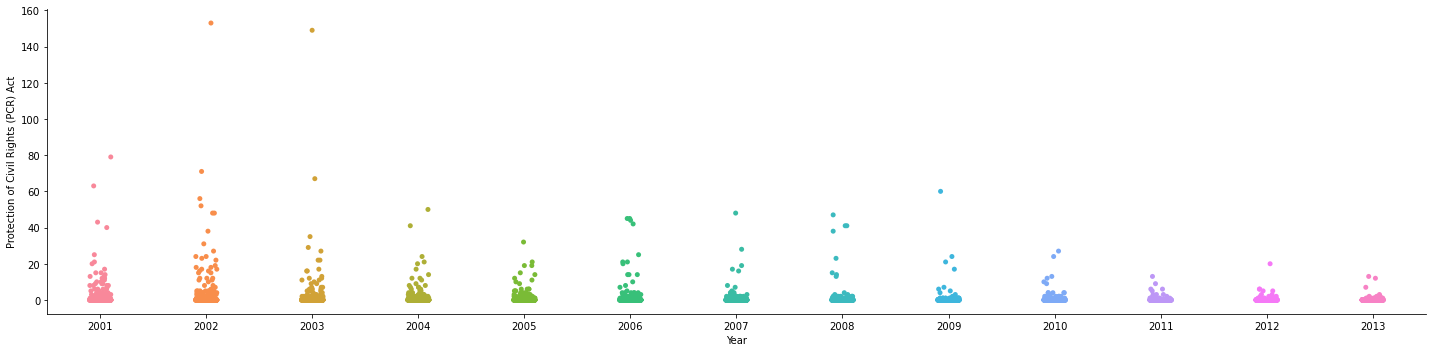

In [39]:
sns.catplot(x='Year', y='Protection of Civil Rights (PCR) Act', data=cbdr,height = 5, aspect = 4)

The cases for PCR was high initially and it decrased as the years progressed with an average for states at around 0-20.

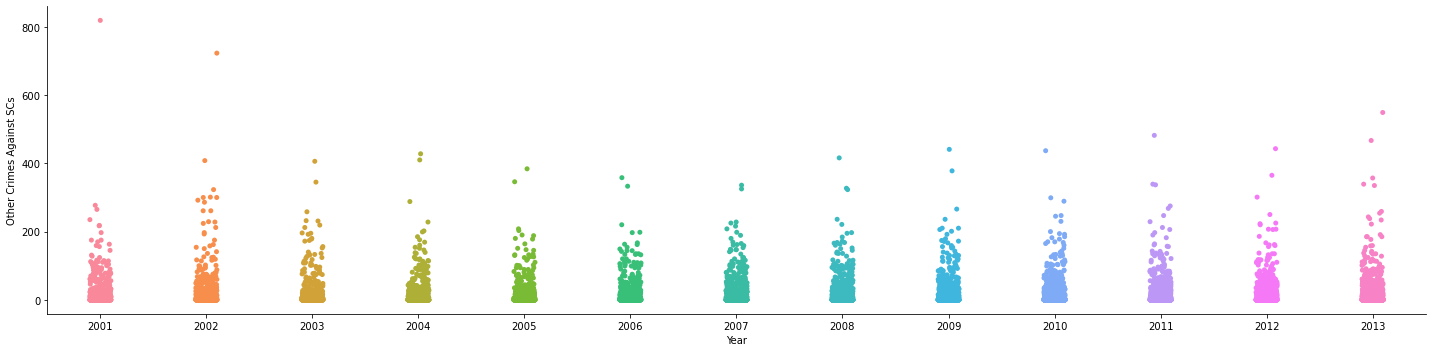

In [40]:
sns.catplot(x='Year', y='Other Crimes Against SCs', data=cbdr,height = 5, aspect = 4)

Hate crimes against SCs are high initially and they decreased as the years progressed. The crimes are almost at a mean of 200.

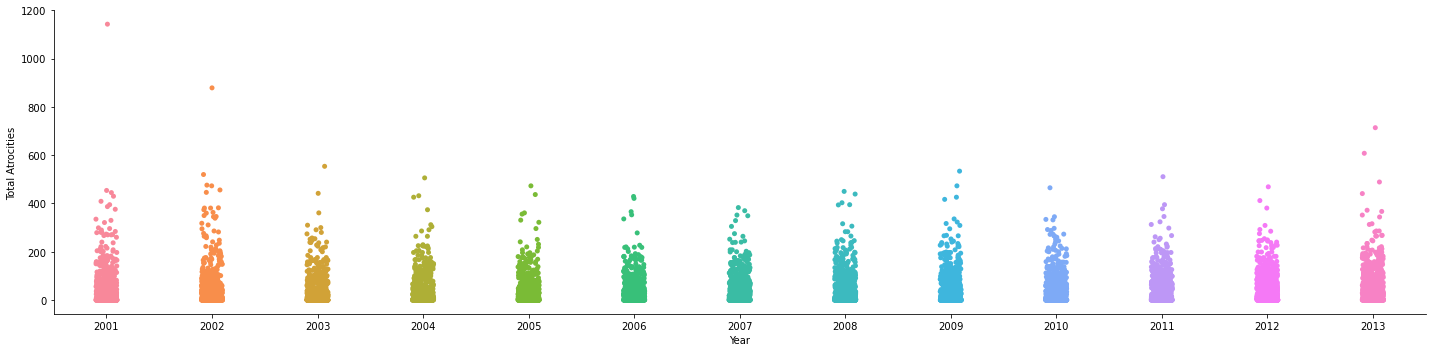

In [41]:
sns.catplot(x='Year', y='Total Atrocities', data=cbdr,height = 5, aspect = 4)

The total atrocities for each state rise up to almost 400+ and they remain constant throughout the years.

# EXPLORATORY DATA ANALYSIS ON THE BASIS OF STATE

This adds total atrocities in the state and makes a new coloumn added to the CBSR dataset.

In [42]:
cbsr['Total Atrocities'] = cbsr['Murder'] +cbsr['Assault on women']+cbsr['Kidnapping and Abduction']+cbsr['Dacoity']+cbsr['Robbery']+cbsr['Arson']+cbsr['Hurt']+cbsr['Prevention of atrocities (POA) Act']+cbsr['Protection of Civil Rights (PCR) Act']+cbsr['Other Crimes Against SCs']
cbsr.head()


,STATE/UT,Year,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs,Total Atrocities
0,ANDHRA PRADESH,2001,45,69,22,3,2,6,518,950,312,1006,2933
1,ANDHRA PRADESH,2002,60,98,18,0,4,12,568,830,459,1336,3385
2,ANDHRA PRADESH,2003,33,79,27,1,15,4,615,1234,165,1386,3559
3,ANDHRA PRADESH,2004,39,66,28,0,7,20,474,1319,68,1234,3255
4,ANDHRA PRADESH,2005,37,74,21,0,0,9,459,1244,61,1212,3117


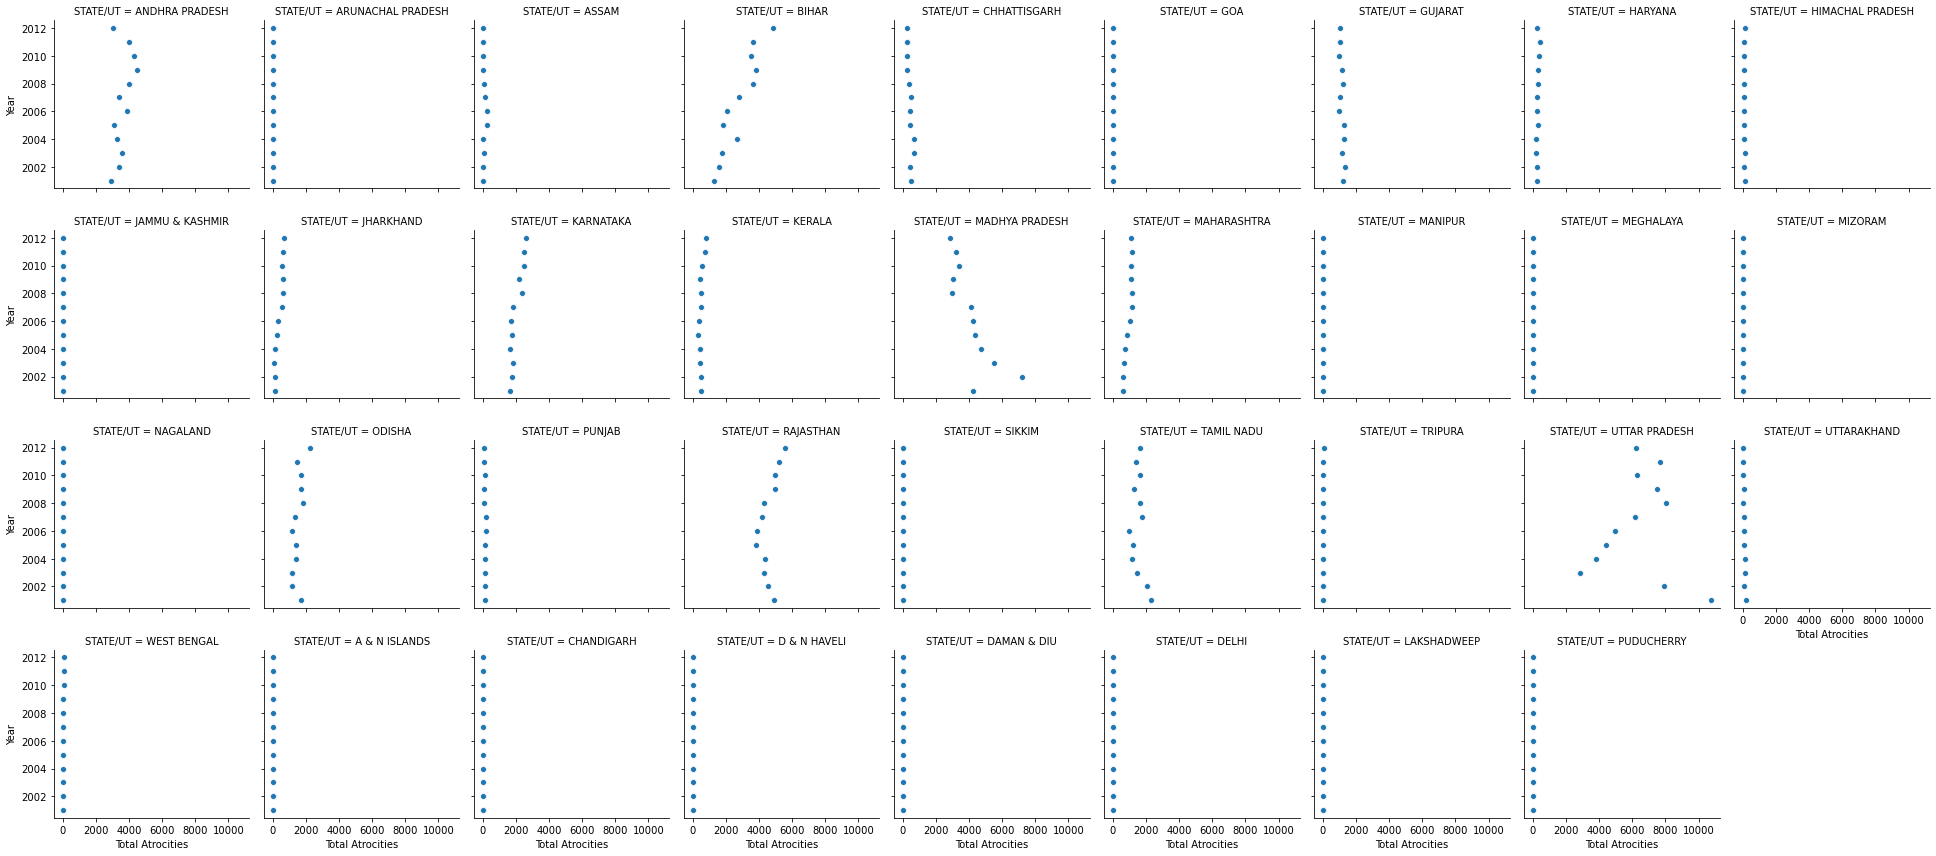

In [43]:
sns.relplot(x ='Total Atrocities', y ='Year', col = 'STATE/UT', data = cbsr, height=3 ,col_wrap = 9)

**This shows the states and UTs over the successive years and the total number of cases rising in them.**

1. States and UTs having a constant rate are - Arunanchal Pradesh, Assam, Goa, Gujarat, Haryana, Himachal Pradesh, Jammu & Kashmir, Kerala,Manipur,Meghalaya, Mizroam, Nagaland, Punjab, Sikkim, Tripura, Uttrakhand, West Bengal, A&N Islands, Chandigarh, D& N Haveli, Daman & Diu, Delhi, Lakshwadeep and Puducherry

2. States and UTs showing flucatuations are Andhra Pradesh, Bihar, Karnataka, Jharkhand, Madhya Pradesh, Maharashtra, Odisha, Rajasthan, Tamil Nadu, Uttar Pradesh.

The worst cases are prevalent in Uttar Pradesh followed by Madhya Pradesh and Rajasthan. 

In [44]:
s= cbsr.groupby(['STATE/UT','Year'])['Murder'].sum().reset_index().sort_values(by='Murder',ascending=False)
s.head(10).style.background_gradient(cmap='Reds')

,STATE/UT,Year,Murder
384,UTTAR PRADESH,2001,423
385,UTTAR PRADESH,2002,371
388,UTTAR PRADESH,2005,323
387,UTTAR PRADESH,2004,321
389,UTTAR PRADESH,2006,318
390,UTTAR PRADESH,2007,310
386,UTTAR PRADESH,2003,288
394,UTTAR PRADESH,2011,286
391,UTTAR PRADESH,2008,239
392,UTTAR PRADESH,2009,235


The highest number of murders are in Uttar Pradesh for the successive years.

In [45]:
s= cbsr.groupby(['STATE/UT','Year'])['Assault on women'].sum().reset_index().sort_values(by='Assault on women',ascending=False)
s.head(10).style.background_gradient(cmap='Purples')

,STATE/UT,Year,Assault on women
229,MADHYA PRADESH,2002,412
384,UTTAR PRADESH,2001,412
394,UTTAR PRADESH,2011,397
391,UTTAR PRADESH,2008,375
239,MADHYA PRADESH,2012,367
235,MADHYA PRADESH,2008,357
230,MADHYA PRADESH,2003,349
234,MADHYA PRADESH,2007,343
232,MADHYA PRADESH,2005,340
231,MADHYA PRADESH,2004,335


Assault on women are having high cases in the state of Madhya Pradesh and Uttar Pradesh.

In [46]:
s= cbsr.groupby(['STATE/UT','Year'])['Kidnapping and Abduction'].sum().reset_index().sort_values(by='Kidnapping and Abduction',ascending=False)
s.head(10).style.background_gradient(cmap='Blues')

,STATE/UT,Year,Kidnapping and Abduction
394,UTTAR PRADESH,2011,363
395,UTTAR PRADESH,2012,258
392,UTTAR PRADESH,2009,254
393,UTTAR PRADESH,2010,248
384,UTTAR PRADESH,2001,219
391,UTTAR PRADESH,2008,219
390,UTTAR PRADESH,2007,153
385,UTTAR PRADESH,2002,130
389,UTTAR PRADESH,2006,113
388,UTTAR PRADESH,2005,99


Kidnapping and Abduction are all prevalent in Uttar Pradesh for the successive years.

In [47]:
s= cbsr.groupby(['STATE/UT','Year'])['Dacoity'].sum().reset_index().sort_values(by='Dacoity',ascending=False)
s.head(10).style.background_gradient(cmap='Greens')

,STATE/UT,Year,Dacoity
249,MAHARASHTRA,2010,22
248,MAHARASHTRA,2009,20
247,MAHARASHTRA,2008,17
384,UTTAR PRADESH,2001,16
251,MAHARASHTRA,2012,16
250,MAHARASHTRA,2011,16
133,GUJARAT,2002,11
245,MAHARASHTRA,2006,11
142,GUJARAT,2011,9
158,HIMACHAL PRADESH,2003,8


Dacoity is prevalent in Maharasthra which is highest during 2008-2010.

In [48]:
s= cbsr.groupby(['STATE/UT','Year'])['Robbery'].sum().reset_index().sort_values(by='Robbery',ascending=False)
s.head(10).style.background_gradient(cmap='Oranges')

,STATE/UT,Year,Robbery
384,UTTAR PRADESH,2001,83
385,UTTAR PRADESH,2002,37
133,GUJARAT,2002,24
139,GUJARAT,2008,24
388,UTTAR PRADESH,2005,22
141,GUJARAT,2010,20
249,MAHARASHTRA,2010,20
137,GUJARAT,2006,19
138,GUJARAT,2007,19
142,GUJARAT,2011,19


Robbery had high cases in 2001 and then it went down to almost half of the original number. It has then successively fallen.

In [49]:
s= cbsr.groupby(['STATE/UT','Year'])['Arson'].sum().reset_index().sort_values(by='Arson',ascending=False)
s.head(10).style.background_gradient(cmap='RdPu')

,STATE/UT,Year,Arson
384,UTTAR PRADESH,2001,178
385,UTTAR PRADESH,2002,103
337,RAJASTHAN,2002,76
390,UTTAR PRADESH,2007,66
229,MADHYA PRADESH,2002,62
389,UTTAR PRADESH,2006,61
388,UTTAR PRADESH,2005,57
230,MADHYA PRADESH,2003,53
391,UTTAR PRADESH,2008,53
338,RAJASTHAN,2003,51


Arson cases were high initially which then decreased over the years. However, Uttar Pradesh state had quite a number for the years.

In [50]:
s = cbsr.groupby(['STATE/UT','Year'])['Hurt'].sum().reset_index().sort_values(by='Hurt',ascending=False)
s.head(10).style.background_gradient(cmap='Greys')

,STATE/UT,Year,Hurt
229,MADHYA PRADESH,2002,1252
232,MADHYA PRADESH,2005,950
238,MADHYA PRADESH,2011,900
231,MADHYA PRADESH,2004,890
237,MADHYA PRADESH,2010,877
230,MADHYA PRADESH,2003,858
384,UTTAR PRADESH,2001,821
233,MADHYA PRADESH,2006,815
20,ANDHRA PRADESH,2009,722
236,MADHYA PRADESH,2009,714


Cases of attack have been most in Madhy Pradesh which is high for a lot of the years.

In [51]:
s= cbsr.groupby(['STATE/UT','Year'])['Prevention of atrocities (POA) Act'].sum().reset_index().sort_values(by='Prevention of atrocities (POA) Act',ascending=False)
s.head(10).style.background_gradient(cmap='Purples')

,STATE/UT,Year,Prevention of atrocities (POA) Act
384,UTTAR PRADESH,2001,4885
59,BIHAR,2012,4436
391,UTTAR PRADESH,2008,3072
58,BIHAR,2011,3024
385,UTTAR PRADESH,2002,2974
336,RAJASTHAN,2001,2965
392,UTTAR PRADESH,2009,2554
57,BIHAR,2010,2548
56,BIHAR,2009,2534
55,BIHAR,2008,2426


Prevention of attrocities were highest in initial years which decreased over the progressive years but in 2012 it almost reached the same number as 2001.

In [52]:
s= cbsr.groupby(['STATE/UT','Year'])['Protection of Civil Rights (PCR) Act'].sum().reset_index().sort_values(by='Protection of Civil Rights (PCR) Act',ascending=False)
s.head(10).style.background_gradient(cmap='Greens')

,STATE/UT,Year,Protection of Civil Rights (PCR) Act
13,ANDHRA PRADESH,2002,459
12,ANDHRA PRADESH,2001,312
362,TAMIL NADU,2003,198
14,ANDHRA PRADESH,2003,165
389,UTTAR PRADESH,2006,133
19,ANDHRA PRADESH,2008,123
18,ANDHRA PRADESH,2007,122
385,UTTAR PRADESH,2002,122
49,BIHAR,2002,113
193,KARNATAKA,2002,101


PCR was high initially for Andhra Pradesh and it decreased over the years showing a good effect of authorities.

In [53]:
s= cbsr.groupby(['STATE/UT','Year'])['Other Crimes Against SCs'].sum().reset_index().sort_values(by='Other Crimes Against SCs',ascending=False)
s.head(10).style.background_gradient(cmap='Blues')

,STATE/UT,Year,Other Crimes Against SCs
229,MADHYA PRADESH,2002,4771
347,RAJASTHAN,2012,4536
394,UTTAR PRADESH,2011,4296
346,RAJASTHAN,2011,4239
344,RAJASTHAN,2009,4014
345,RAJASTHAN,2010,3974
393,UTTAR PRADESH,2010,3795
384,UTTAR PRADESH,2001,3683
230,MADHYA PRADESH,2003,3676
392,UTTAR PRADESH,2009,3645


Discriminatory crimes have maintained a constant rate over the years and has not dropped much.

In [54]:
s= cbsr.groupby(['STATE/UT','Year'])['Total Atrocities'].sum().reset_index().sort_values(by='Total Atrocities',ascending=False)
s.head(10).style.background_gradient(cmap='Greys')

,STATE/UT,Year,Total Atrocities
384,UTTAR PRADESH,2001,10732
391,UTTAR PRADESH,2008,8009
385,UTTAR PRADESH,2002,7927
394,UTTAR PRADESH,2011,7702
392,UTTAR PRADESH,2009,7522
229,MADHYA PRADESH,2002,7217
393,UTTAR PRADESH,2010,6272
395,UTTAR PRADESH,2012,6202
390,UTTAR PRADESH,2007,6144
347,RAJASTHAN,2012,5559


Total number of Hate Crime are maximum in Uttar Pradesh which hasn't gone down a bit over the years.

In [55]:
x = cbsr['Year']
y = cbsr['Total Atrocities']

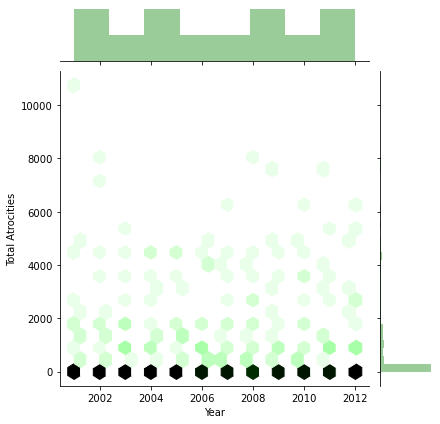

In [56]:
sns.axes_style('white')
sns.jointplot(x=x, y=y, kind = 'hex', color = 'green')

This shows Total Crimes by states which has a high value of 300 for almost each state in a year.

The black Hexagon shows the mean for that particular year and the green fainted hexagon means the values the state reach upto.

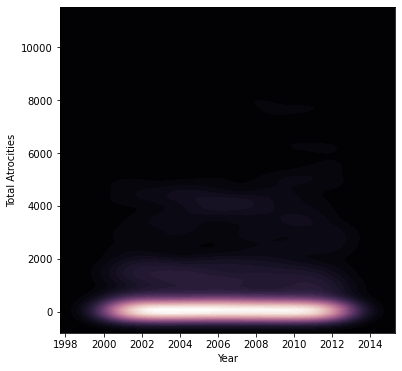

In [57]:
f, ax = plt.subplots(figsize=(6,6))
cmap = sns.cubehelix_palette(as_cmap = True, dark=0,light = 1,reverse=True)
sns.kdeplot(x,y,cmap=cmap, n_levels = 60, shade= True)

This shows a mean of around 300 for atrocities for each state in a year.

# EXPLORATORY DATA ANALYSIS ON THE BASIS OF TOTAL DATA COMPRISING OF STATES+UTs


This shows total crimes for each year which is added in the form of column 'Total Atrocities' into the 'Total' DataFrame.

In [58]:
total['Total Atrocities'] = total['Murder'] +total['Assault on women']+total['Kidnapping and Abduction']+total['Dacoity']+total['Robbery']+total['Arson']+total['Hurt']+total['Prevention of atrocities (POA) Act']+total['Protection of Civil Rights (PCR) Act']+total['Other Crimes Against SCs']
total.head(15)

,STATE/UT,Year,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs,Total Atrocities
444,TOTAL (ALL-INDIA),2001,763,1316,400,41,133,354,4547,13113,633,12201,33501
445,TOTAL (ALL-INDIA),2002,739,1331,319,29,105,322,4491,10770,1018,14383,33507
446,TOTAL (ALL-INDIA),2003,581,1089,232,24,70,204,3969,8048,634,11401,26252
447,TOTAL (ALL-INDIA),2004,654,1157,253,26,72,211,3824,8891,364,11435,26887
448,TOTAL (ALL-INDIA),2005,669,1172,258,26,80,210,3847,8497,291,11077,26127
449,TOTAL (ALL-INDIA),2006,673,1217,280,30,90,226,3760,8581,405,11808,27070
450,TOTAL (ALL-INDIA),2007,674,1349,332,23,86,238,3814,9819,206,13490,30031
451,TOTAL (ALL-INDIA),2008,622,1453,477,50,81,224,4134,11465,279,14645,33430
452,TOTAL (ALL-INDIA),2009,629,1350,511,42,67,195,4322,11037,168,15091,33412
453,TOTAL (ALL-INDIA),2010,572,1350,510,41,75,150,4344,10419,143,15039,32643


In [59]:
s= total.groupby(['Year'])['Murder'].sum().reset_index().sort_values(by='Murder',ascending=False)
s.head(15).style.background_gradient(cmap='Reds')

,Year,Murder
0,2001,763
1,2002,739
6,2007,674
5,2006,673
10,2011,673
4,2005,669
3,2004,654
11,2012,651
8,2009,629
7,2008,622


This shows highest number of murders for 2001 and 2002 which then decreases as years progresses.

In [60]:
s= total.groupby(['Year'])['Assault on women'].sum().reset_index().sort_values(by='Assault on women',ascending=False)
s.head(15).style.background_gradient(cmap='Blues')

,Year,Assault on women
11,2012,1576
10,2011,1557
7,2008,1453
8,2009,1350
9,2010,1350
6,2007,1349
1,2002,1331
0,2001,1316
5,2006,1217
4,2005,1172


This shows that the assault on women have increasing recently and were less in the initial years.

In [61]:
s= total.groupby(['Year'])['Kidnapping and Abduction'].sum().reset_index().sort_values(by='Kidnapping and Abduction',ascending=False)
s.head(12).style.background_gradient(cmap='Purples')

,Year,Kidnapping and Abduction
10,2011,616
8,2009,511
9,2010,510
11,2012,490
7,2008,477
0,2001,400
6,2007,332
1,2002,319
5,2006,280
4,2005,258


This shows kindnapping and abduction has increased over the successive years.

In [62]:
s= total.groupby(['Year'])['Dacoity'].sum().reset_index().sort_values(by='Dacoity',ascending=False)
s.head(15).style.background_gradient(cmap='Greens')

,Year,Dacoity
7,2008,50
8,2009,42
0,2001,41
9,2010,41
10,2011,36
5,2006,30
1,2002,29
11,2012,27
3,2004,26
4,2005,26


This shows that dacoity reached a high around the middle years and were less on each end.

In [63]:
s= total.groupby(['Year'])['Robbery'].sum().reset_index().sort_values(by='Robbery',ascending=False)
s.head(15).style.background_gradient(cmap='Oranges')

,Year,Robbery
0,2001,133
1,2002,105
5,2006,90
6,2007,86
7,2008,81
4,2005,80
9,2010,75
3,2004,72
2,2003,70
8,2009,67


This shows that robbery was high for initial years and decreased a lot as years progressed.

In [64]:
s= total.groupby(['Year'])['Arson'].sum().reset_index().sort_values(by='Arson',ascending=False)
s.head(15).style.background_gradient(cmap='RdPu')

,Year,Arson
0,2001,354
1,2002,322
6,2007,238
5,2006,226
7,2008,224
11,2012,214
3,2004,211
4,2005,210
2,2003,204
8,2009,195


This shows cases of arson decreasing over the years. They were high initially.

In [65]:
s = total.groupby(['Year'])['Hurt'].sum().reset_index().sort_values(by='Hurt',ascending=False)
s.head(15).style.background_gradient(cmap='Greys')

,Year,Hurt
0,2001,4547
1,2002,4491
9,2010,4344
8,2009,4322
10,2011,4247
7,2008,4134
2,2003,3969
11,2012,3855
4,2005,3847
3,2004,3824


This shows the attack were very high in initial years. Over the successive years, they have gone down but not a huge rate.

In [66]:
s= total.groupby(['Year'])['Prevention of atrocities (POA) Act'].sum().reset_index().sort_values(by='Prevention of atrocities (POA) Act',ascending=False)
s.head(15).style.background_gradient(cmap='Purples')

,Year,Prevention of atrocities (POA) Act
0,2001,13113
11,2012,12576
7,2008,11465
10,2011,11342
8,2009,11037
1,2002,10770
9,2010,10419
6,2007,9819
3,2004,8891
5,2006,8581


This shows POA hgh for 2001 and then it goes on decreasing until it becomes high again from 2010.

In [67]:
s= total.groupby(['Year'])['Protection of Civil Rights (PCR) Act'].sum().reset_index().sort_values(by='Protection of Civil Rights (PCR) Act',ascending=False)
s.head(15).style.background_gradient(cmap='Greens')

,Year,Protection of Civil Rights (PCR) Act
1,2002,1018
2,2003,634
0,2001,633
5,2006,405
3,2004,364
4,2005,291
7,2008,279
6,2007,206
8,2009,168
9,2010,143


PCR was very high in the initial years but decreased to a small number as the years progressed.

In [68]:
s= total.groupby(['Year'])['Other Crimes Against SCs'].sum().reset_index().sort_values(by='Other Crimes Against SCs',ascending=False)
s.head(15).style.background_gradient(cmap='Blues')

,Year,Other Crimes Against SCs
8,2009,15091
9,2010,15039
10,2011,14958
7,2008,14645
1,2002,14383
11,2012,14164
6,2007,13490
0,2001,12201
5,2006,11808
3,2004,11435


Discriminatory crimes have been high for almost all years but in the recent years, they have gone much up.

In [69]:
s= total.groupby(['Year'])['Total Atrocities'].sum().reset_index().sort_values(by='Total Atrocities',ascending=False)
s.head(15).style.background_gradient(cmap='Greys')

,Year,Total Atrocities
10,2011,33719
11,2012,33655
1,2002,33507
0,2001,33501
7,2008,33430
8,2009,33412
9,2010,32643
6,2007,30031
5,2006,27070
3,2004,26887


The total number of crimes were high initially and then they decreased. After 2010, these hate crimes have attained a high rate again.

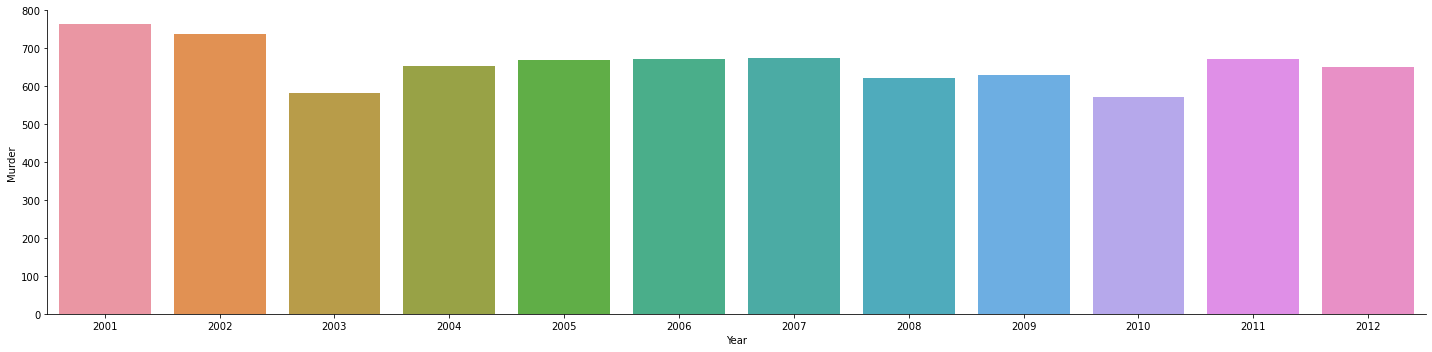

In [70]:
sns.catplot(x='Year', y='Murder', data=total ,height = 5, aspect = 4,kind = 'bar')

This shows an average of 700 murders are done in Hate Crimes in a year.

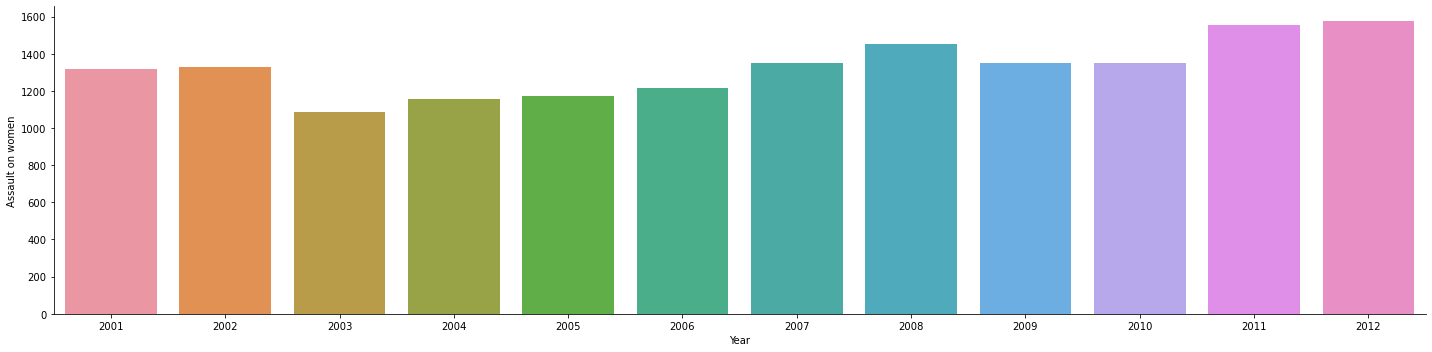

In [71]:
sns.catplot(x='Year', y='Assault on women', data=total ,height = 5, aspect = 4,kind = 'bar')

This shows the assault on women have increased over the years.

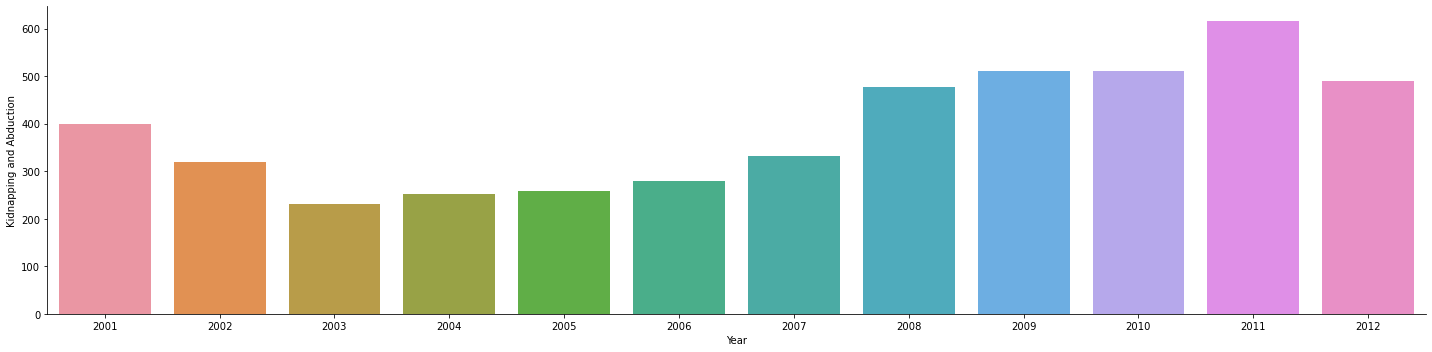

In [72]:
sns.catplot(x='Year', y='Kidnapping and Abduction', data=total ,height = 5, aspect = 4,kind = 'bar')

Kidnapping and Abduction have also increased over the years reaching an all time high for 2011.

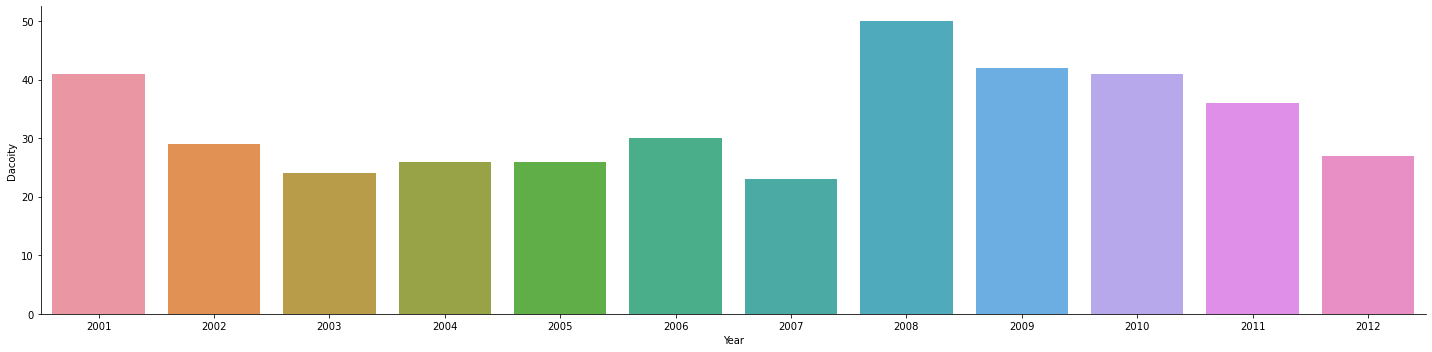

In [73]:
sns.catplot(x='Year', y='Dacoity', data=total ,height = 5, aspect = 4,kind = 'bar')

Dacoity reached a low number in the median years but rose up sharply. For the last quantile of years, it has gone down.

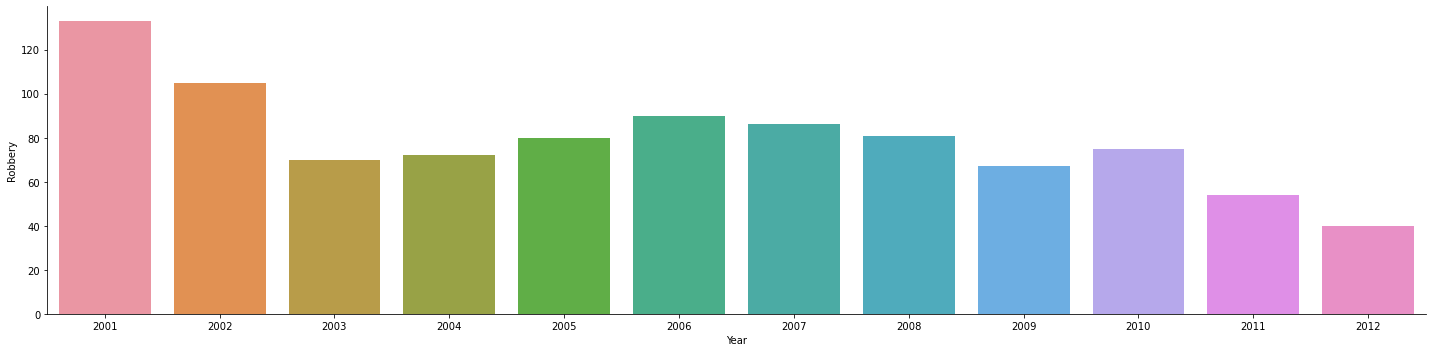

In [74]:
sns.catplot(x='Year', y='Robbery', data=total ,height = 5, aspect = 4,kind = 'bar')

This shows robbery was very high initially and it went to a lower number over the years.

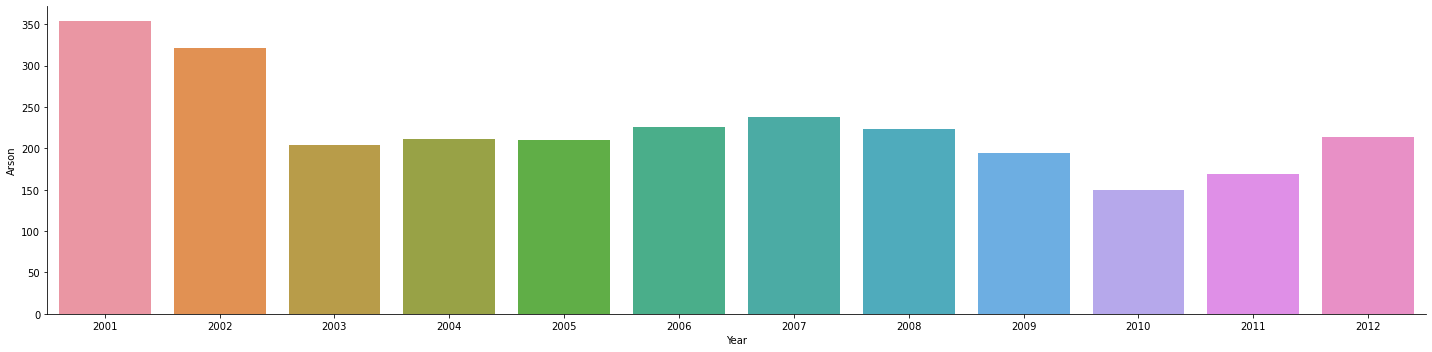

In [75]:
sns.catplot(x='Year', y='Arson', data=total ,height = 5, aspect = 4,kind = 'bar')

Cases of arson were also high during the initial years with successive years making it low.

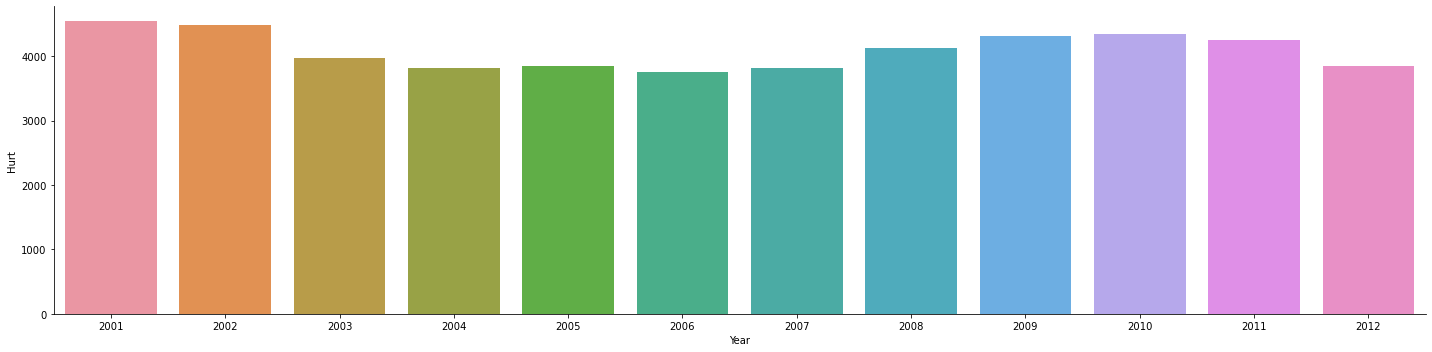

In [76]:
sns.catplot(x='Year', y='Hurt', data=total ,height = 5, aspect = 4,kind = 'bar')

POA has been high for almost all the years and hasn't gone down much for even a single year. This shows this has maintained almost a constant rate for the years.

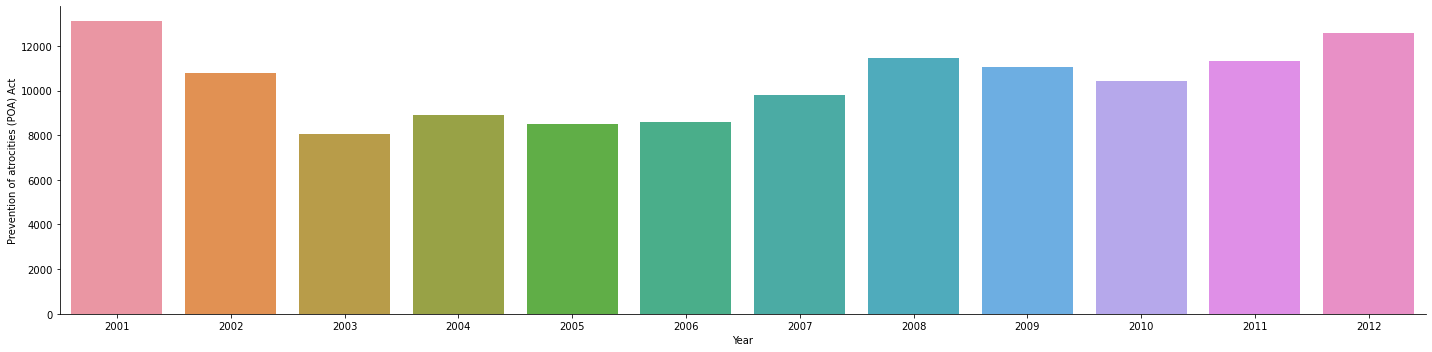

In [77]:
sns.catplot(x='Year', y='Prevention of atrocities (POA) Act', data=total ,height = 5, aspect = 4,kind = 'bar')

POA has fairly a high number already and it has a mean of about 9000 which is high. Initially, it was high and for the middle quantile it decreased. For the last quantile, it again increased.

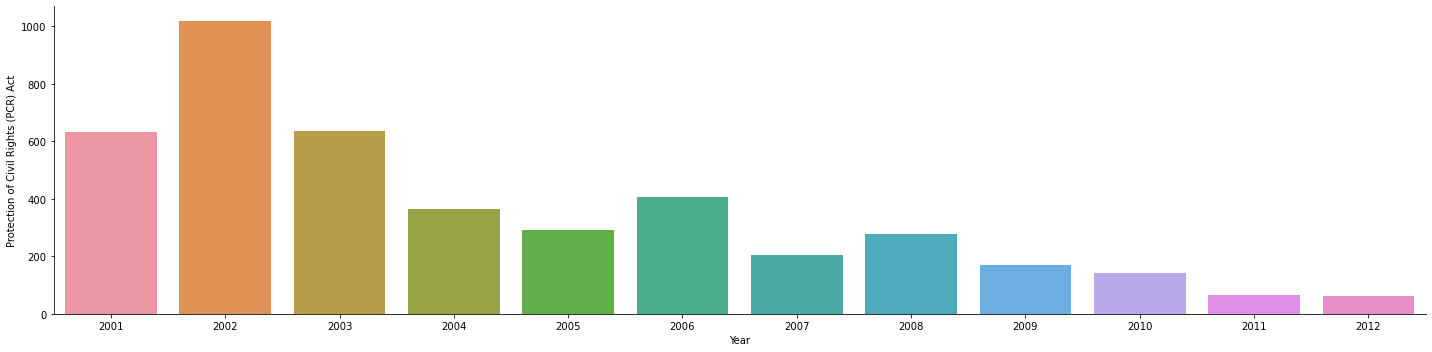

In [78]:
sns.catplot(x='Year', y='Protection of Civil Rights (PCR) Act', data=total ,height = 5, aspect = 4,kind = 'bar')

This shows that over the years PCR has decreased to a very small number showing better effect in this case.

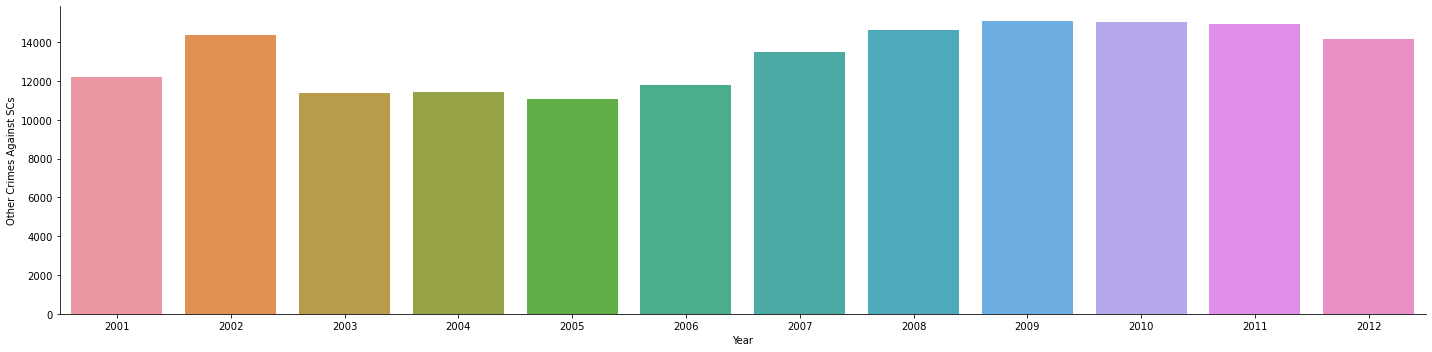

In [79]:
sns.catplot(x='Year', y='Other Crimes Against SCs', data=total ,height = 5, aspect = 4,kind = 'bar')

Discriminatory attacks have increased successively over the years and they are the highest magnitude of crimes done in India.

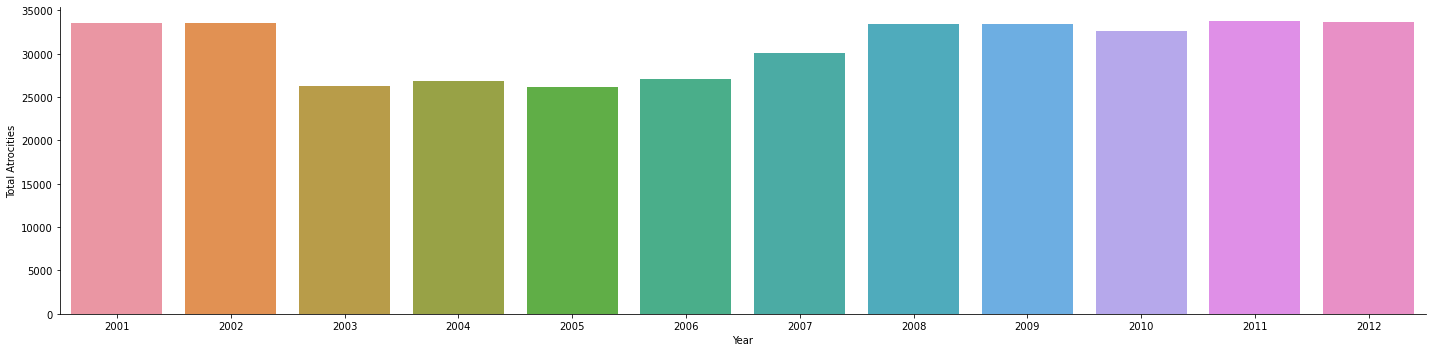

In [80]:
sns.catplot(x='Year', y='Total Atrocities', data=total ,height = 5, aspect = 4,kind = 'bar')

**This shows that almost 30000+ Hate Crimes have been done in India from 2001-2012. The crimes went down for a bit but has maintained a constant rate. This shows that a lot of work has to be done in bringing hate crimes to a low number.**